In [4]:
# <!-- collapse=True -->
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Distribution des couleurs 

In [5]:
from scipy import ndimage
import matplotlib.colors as clrs

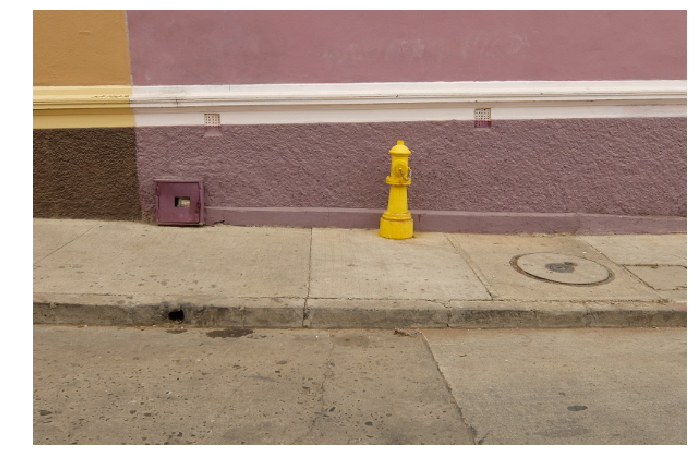

In [168]:
# <!-- collapse=True -->
filename = './images/valparaiso_color.jpg'
I = ndimage.imread(filename)
I = I/255

plt.figure(figsize=(12, 8))
plt.imshow( I )
plt.axis('off');

## La couleur moyenne

[ 0.61138102  0.51106783  0.44297092]


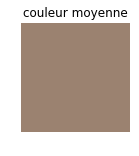

In [169]:
# <!-- collapse=True -->
m = np.mean(I, (0, 1))
print( m )
plt.figure(figsize=(2, 2) )
plt.imshow(m*np.ones((10, 10, 3))); plt.axis('off');
plt.title('couleur moyenne');

## Explore the color space

In [170]:
I_hsv = clrs.rgb_to_hsv(I)

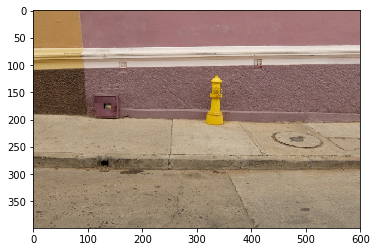

In [171]:
plt.imshow( clrs.hsv_to_rgb( I_hsv ) );

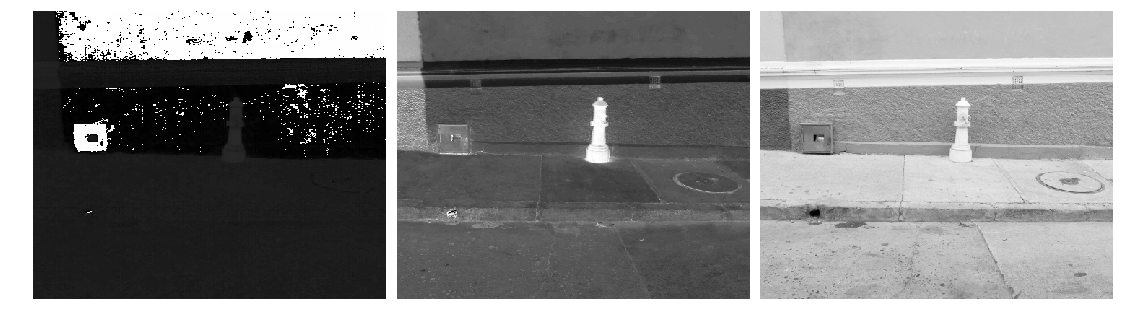

In [172]:
n_graph = 3
fig, ax = plt.subplots(1, n_graph, sharey=True, figsize=(n_graph*5, 4));
for i in range(n_graph):
    ax[i].imshow( 1-I_hsv[:, :, i], cmap='Greys' );
    ax[i].axis('off');
plt.subplots_adjust(wspace=0.03, hspace=.02 , top=1, bottom=0, left=0, right=1);

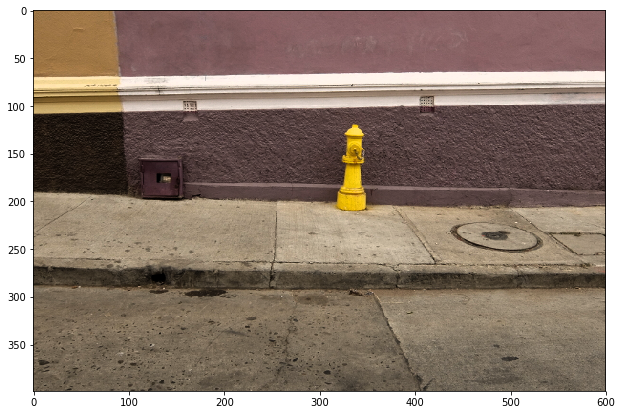

In [173]:
# Augmenter le contraste ...
J = I_hsv.copy()

# hue, sat, value
#J[:, :, 0] = .5
#J[:, :, 1] = 1
J[:, :, 2] = 1.3*J[:, :, 2]**2
J[:, :, 2][J[:, :, 2]>1] = 1

plt.figure(figsize=(12, 7))
plt.imshow( clrs.hsv_to_rgb(J) );

## si on ne considère pas la valeurs, mais seulement la teinte et la saturation:

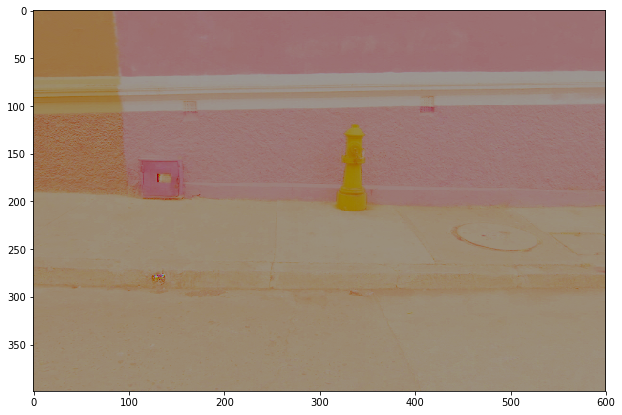

In [201]:
J = I_hsv.copy()

J[:, :, 2] = np.mean( J[:, :, 2] )

plt.figure(figsize=(12, 7))
plt.imshow(  clrs.hsv_to_rgb(J) );

In [175]:
pixels = I_hsv.reshape( (1, -1,  3 ) )[0]
print( len(pixels) )

239400


In [176]:
H, S, V = pixels[:, 0], pixels[:, 1], pixels[:, 2]

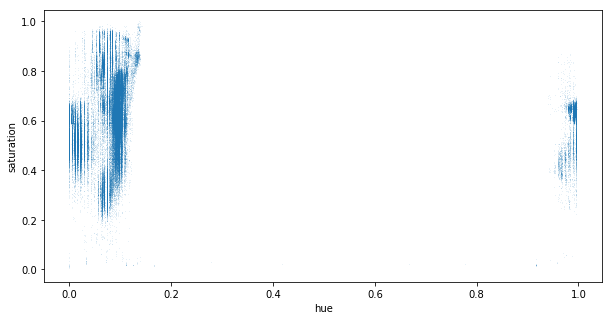

In [177]:
plt.figure(figsize=(10, 5))
plt.plot( H, V, ',', alpha=.1);
#plt.axis('equal');
plt.xlabel('hue');plt.ylabel('saturation');

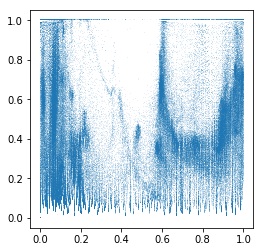

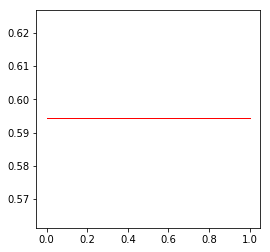

In [161]:
plt.figure(figsize=(4, 4))
plt.plot( H, S, ',', alpha=.1);
#plt.axis('equal');

plt.figure(figsize=(4, 4))
plt.plot( S, V, ',r', alpha=.1);
#plt.axis('equal');

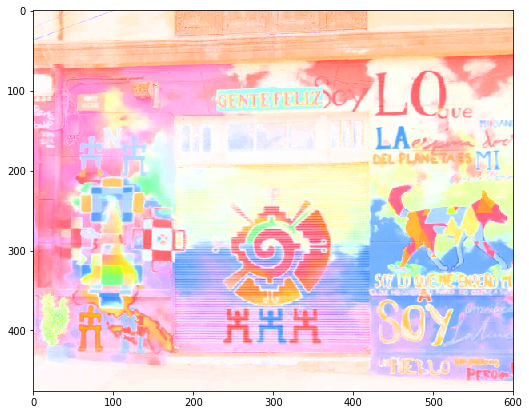

## K-Means

In [2]:
from sklearn.cluster import KMeans

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [208]:
pixels = I_hsv.reshape( (1, -1,  3 ) )[0]
print( len(pixels) )
pixels[:, 2] = .5
km = KMeans( n_clusters=5, n_init=2 ).fit( pixels )

239400


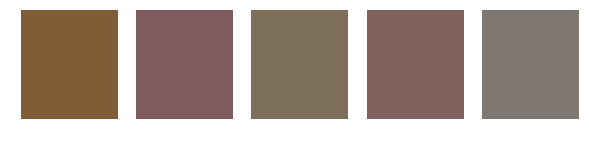

In [209]:
n_graph = len( km.cluster_centers_ )
fig, ax = plt.subplots(1, n_graph, sharey=True, figsize=(n_graph*2, 2));
for i, c in enumerate( km.cluster_centers_):
    ax[i].imshow( clrs.hsv_to_rgb( c*np.ones((10, 10, 3)))) ;
    ax[i].axis('off');

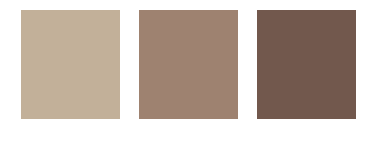

In [52]:
km = KMeans( n_clusters=3 ).fit( pixels )

n_graph = len( km.cluster_centers_ )
fig, ax = plt.subplots(1, n_graph, sharey=True, figsize=(n_graph*2, 2));
for i, c in enumerate( km.cluster_centers_):
    ax[i].imshow(c*np.ones((10, 10, 3)));
    ax[i].axis('off');

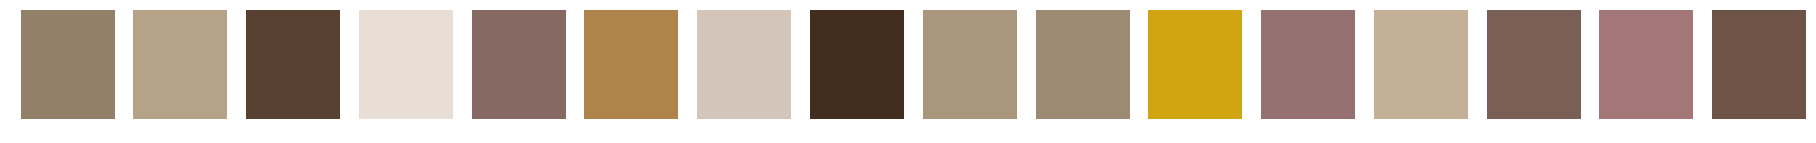

In [53]:
km = KMeans( n_clusters=16 ).fit( pixels )

n_graph = len( km.cluster_centers_ )
fig, ax = plt.subplots(1, n_graph, sharey=True, figsize=(n_graph*2, 2));
for i, c in enumerate( km.cluster_centers_):
    ax[i].imshow(c*np.ones((10, 10, 3)));
    ax[i].axis('off');

## Le cube primaire (RGB)

In [49]:
pixels = I.reshape( (1, -1,  3 ) )[0]
print( len(pixels) )

239400


In [327]:
cube_RGB = np.zeros((256, 256, 256))

for rgb in pixels:
    r, g, b = rgb
    cube_RGB[r, g, b] += 1
    
np.max( cube_RGB )

327.0

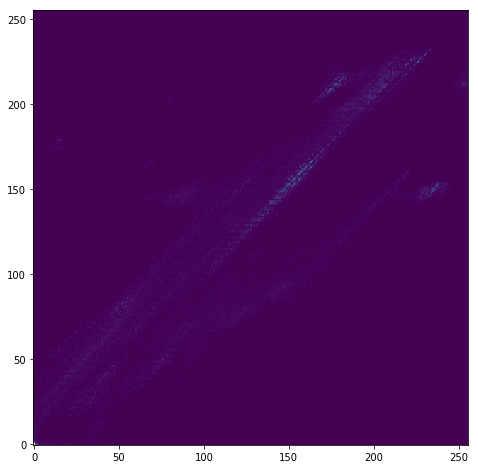

In [330]:
plt.figure(figsize=(12, 8))
plt.imshow( cube_RGB.max(0)/np.max( cube_RGB )*255 , origin="lower" )

In [302]:
R, G, B = pixels[:, 0], pixels[:, 1], pixels[:, 2]

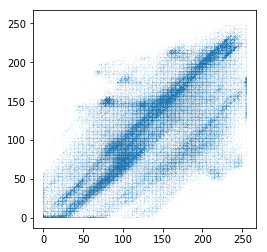

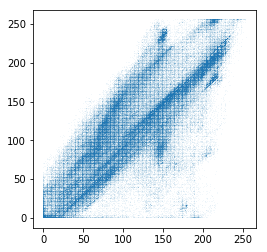

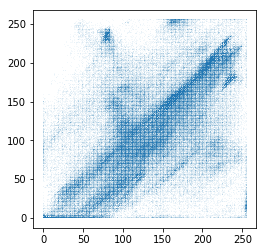

In [303]:
plt.figure(figsize=(4, 4))
plt.plot( R, G, ',', alpha=.05);

plt.figure(figsize=(4, 4))
plt.plot( G, B, ',', alpha=.05);

plt.figure(figsize=(4, 4))
plt.plot( R, B, ',', alpha=.05);

In [293]:
cube_RG = np.zeros((255, 255, 3))
cube_GB = np.zeros((255, 255, 3))
cube_RB = np.zeros((255, 255, 3))

face = 255
for rgb in pixels:
    r, g, b = rgb
    #cube_RGB[r, g, b] = rgb
    cube_RG[r, g] = np.array( [r, g, face] )
    cube_GB[g, b] = np.array( [face, g, b] )
    cube_RB[r, b] = np.array( [r, face, b] )

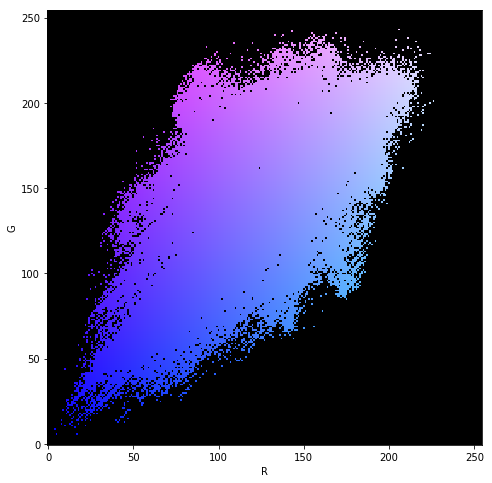

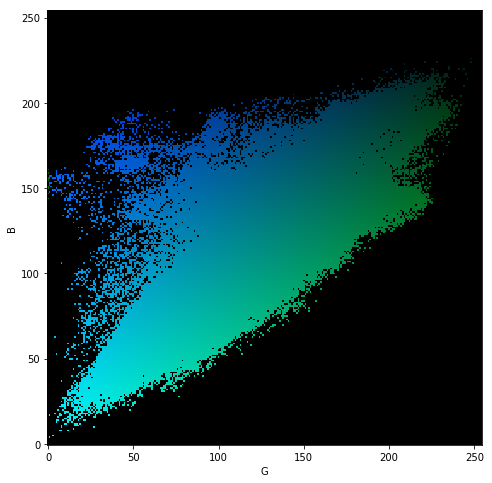

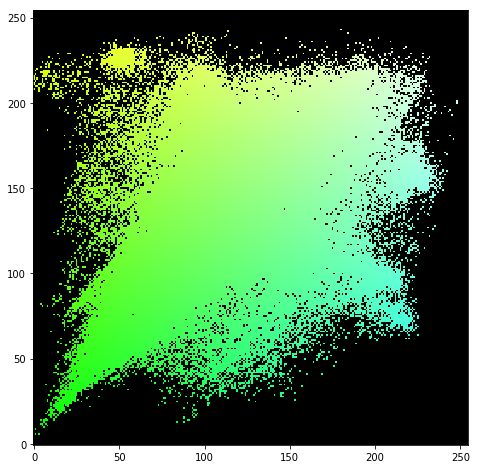

In [294]:
plt.figure(figsize=(12, 8))
plt.imshow( cube_RG/255, origin="lower" )
plt.xlabel( 'R' );plt.ylabel( 'G' );

plt.figure(figsize=(12, 8))
plt.imshow( cube_GB , origin="lower" )
plt.xlabel( 'G' );plt.ylabel( 'B' );

plt.figure(figsize=(12, 8))
plt.imshow( cube_RB/255 , origin="lower" )


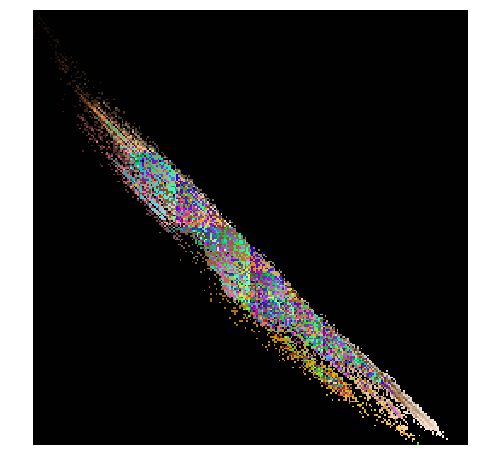

In [86]:
plt.figure(figsize=(12, 8))
plt.imshow( cube_RGB.mean(axis=2) )
plt.axis('off');